In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading in the data
columns = ['Cement',
           'Slag',
           'Fly ash',
           'Water',
           'SP',
           'Coarse Aggr',
           'Fine Aggr',
           'output']

train_data = pd.read_csv('concrete/train.csv', names=columns, header=None)
test_data = pd.read_csv('concrete/test.csv', names=columns, header=None)


1.0
0.5
0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625
0.001953125
0.0009765625
0.00048828125
0.000244140625
0.0001220703125
6.103515625e-05
3.0517578125e-05
1.52587890625e-05


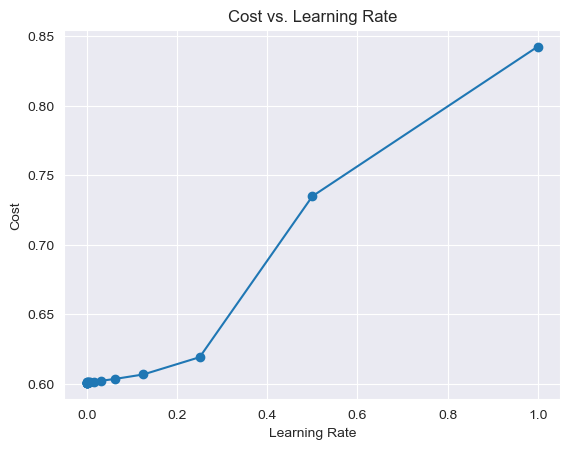

Learned Weights: [-0.00790805 -0.19994061 -0.15846366  0.37597151 -0.02943154  0.11834296
 -0.03381011 -0.01590951]
Learning Rate:  7.62939453125e-06


0    -0.005574
1     0.568593
2     0.798260
3     0.568593
4     0.855677
5     0.453760
6    -0.579742
7     1.085340
8     0.626010
9    -2.072580
10    0.683427
11    0.224093
12    0.453760
13    0.626010
14   -0.694575
15    0.338926
16   -0.292658
17   -2.072580
18    0.798260
19    0.281509
20   -1.957740
21    0.568593
22    0.913093
23   -2.072580
24    0.568593
25    0.338926
26   -0.235241
27   -0.407492
28   -0.579742
29    0.970510
30    1.085340
31    0.769552
32    1.027930
33    0.568593
34    0.224093
35    0.654718
36   -0.981659
37    0.740843
38   -0.407492
39   -0.407492
40    0.511176
41   -1.842910
42    0.740843
43    0.568593
44   -0.120408
45   -0.407492
46    0.338926
47   -0.694575
48    0.338926
49   -1.728080
50   -2.072580
51   -0.062991
52    0.109259
Name: output, dtype: float64


In [16]:
def batch_gradient_descent(data, result_variable, learning_rate=1.0, tolerance=1e-6):

    # Extract features and target variable for training
    X_train = data.drop(result_variable, axis=1).values
    y_train = train_data[result_variable].values

    # Initialize weight vector with zeros
    weights = np.zeros(X_train.shape[1])

    # variables to store cost function values and number of steps/iterations the program goes through
    costs = []
    steps = 0

    while True:
        steps += 1
        prev_weights = weights.copy()

        #predictions
        y_pred = np.dot(X_train, weights)

        #error
        error = y_pred - y_train

        #gradients
        gradients = np.dot(X_train.T, error) / len(X_train)

        # Update weights
        new_weights = weights - learning_rate * gradients
        weights = new_weights

        # Calculate the cost on training data
        cost_train = np.mean((y_pred - y_train) ** 2)
        costs.append(cost_train)

        # Check for convergence based on the norm of weight difference
        if np.linalg.norm(new_weights - prev_weights) < tolerance:
            # Plot cost vs. number of steps
            plt.plot(range(steps), costs, marker='o')
            plt.xlabel('Number of Steps')
            plt.ylabel('Cost (Training Data)')
            plt.title('Cost vs. Number of Steps')
            plt.grid(True)
            plt.show()
            return weights, steps, learning_rate

        # Decrease the learning rate
        #print("Learning Rate: ", learning_rate)
        learning_rate *= 0.5




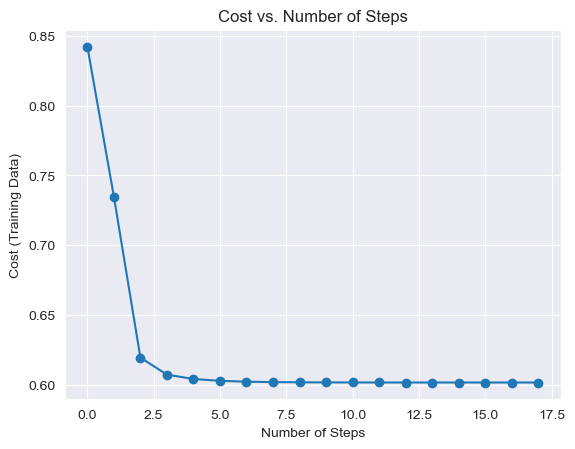

Learned Weights: [-0.0078226  -0.19959296 -0.15863473  0.37577773 -0.02918666  0.11809481
 -0.03346571]
Number of Steps:  18
Learning Rate:  7.62939453125e-06


In [28]:
#calling batch gradient descent by giving the data and the result column name
learned_weights, num_steps, learning_rate = batch_gradient_descent(train_data, 'output')
print('Learned Weights:', learned_weights)
print('Number of Steps: ', num_steps)
print("Learning Rate: ", learning_rate)

In [29]:
Test_data = test_data.drop('output', axis=1).values
final_weights = learned_weights 

# Calculate predictions on the test data
y_pred_test = np.dot(Test_data, final_weights)

Test_data_output = test_data['output'].values

# Calculate the mean squared error (MSE) as the cost on the test data
test_cost = np.mean((y_pred_test - Test_data_output) ** 2)

print('Cost Test Data:', test_cost)


Cost Test Data: 0.8674695544986697


## Stochastic gradient descent

In [5]:
columns = ['Cement',
           'Slag',
           'Fly ash',
           'Water',
           'SP',
           'Coarse Aggr',
           'Fine Aggr',
           'output']

train_data = pd.read_csv('concrete/train.csv', names=columns, header=None)
test_data = pd.read_csv('concrete/test.csv', names=columns, header=None)

In [19]:

def stochastic_gradient_descent(data, result_variable, initial_learning_rate=0.1, tolerance=1e-6):

    # Extract features and target variable for training
    X_train = data.drop(result_variable, axis=1).values
    y_train = data[result_variable].values


    # Initialize weights
    weights = np.zeros(X_train.shape[1])

    # Store learning rates, cost function values, and the number of updates
    learning_rates = []
    costs = []
    num_updates = 0

    while True:
        # Shuffle the training data for each interation until convergence
        idx = np.random.permutation(len(X_train))
        X_train_shuffled_random = X_train[idx]
        y_train_shuffled_random = y_train[idx]

        for i in range(len(X_train)):
            
            # Sample a random training example
            xi = X_train_shuffled_random[i]
            yi = y_train_shuffled_random[i]

            #prediction and error
            y_pred = np.dot(xi, weights)
            error = y_pred - yi

            #gradient for this example
            gradient = xi * error

            # Update weights
            new_weights = weights - initial_learning_rate * gradient
            weights = new_weights

            # Calculate the cost
            predictions = np.dot(X_train, weights)
            errors = predictions - y_train
            cost_train = np.mean(errors**2) / 2
            costs.append(cost_train)
            learning_rates.append(initial_learning_rate)
            num_updates += 1

            # Check for convergence
            if len(costs) > 1 and np.abs(costs[-1] - costs[-2]) < tolerance:
                # Plot cost vs. number of updates
                plt.plot(range(num_updates), costs, marker='o')
                plt.xlabel('Number of Updates')
                #cost on training data
                plt.ylabel('Cost')
                plt.title('Cost vs. Number of Updates')
                plt.grid(True)
                plt.show()
                return weights, initial_learning_rate, num_updates

            # Decrease the learning rate
            #print('learning Rate: ', initial_learning_rate)
            initial_learning_rate *= 0.5


    return weights, initial_learning_rate

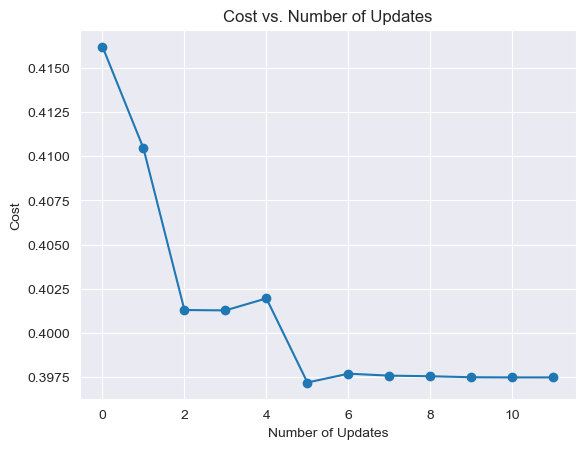

Learned Weights: [ 0.04312774 -0.02860202 -0.07610598  0.01311787 -0.00228479  0.0100141
  0.05061606]
Learning Rate:  4.8828125e-05
Number of Updates 12


In [35]:
# calling the function
learned_weights, learning_rate, num_updates = stochastic_gradient_descent(train_data, 'output')
print('Learned Weights:', learned_weights)
print('Learning Rate: ', learning_rate)
print('Number of Updates', num_updates)

In [37]:
Test_data = test_data.drop('output', axis=1).values
final_weights = learned_weights

# Calculate predictions on the test data
y_pred_test = np.dot(Test_data, final_weights)

Test_data_output = test_data['output'].values

# Calculate the mean squared error (MSE) as the cost on the test data
test_cost = np.mean((y_pred_test - Test_data_output) ** 2)

print('Cost on Test Data:', test_cost)

Cost on Test Data: 1.0931363166050332
